In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('mi_moneda.jpg')
img = cv2.resize(img, (0, 0), fx=0.3, fy=0.3)  # para ajustar el tamaño
img = cv2.GaussianBlur(img, (7, 7), 0)  # para suavizar la imagen

(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

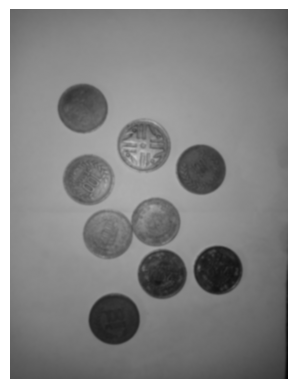

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Convertir de BGR a RGB
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #Convertir de RGB a GRIS
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255) 
plt.axis('off')

Ahora se binariza la imagen

(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

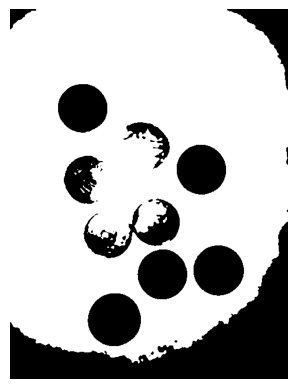

In [4]:
#Se aplica la binarización y suavizado
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
_, imgbin = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(imgbin, cmap='gray')
plt.axis('off')

Se invierten las intensidades

(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

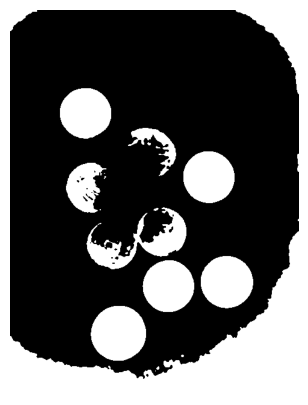

In [5]:
imgbin2 = 255 - imgbin   # Invertir la imagen binaria
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Se procede a erosionar la imagen

(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

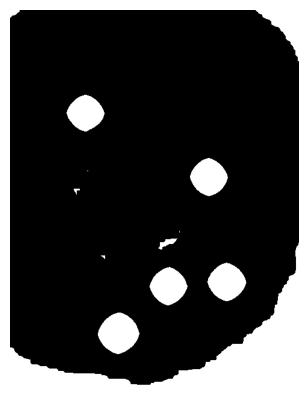

In [6]:
imgbin2_erosion = cv2.erode(imgbin2, np.ones((5, 5), np.uint8), iterations=5)
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2_erosion, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [7]:
_, markers = cv2.connectedComponents(imgbin2_erosion)
np.unique(markers)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int32)

Número de componentes únicos detectados: 14


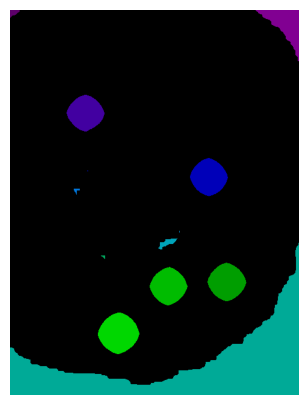

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(markers, cmap='nipy_spectral', vmin=0, vmax=24)
plt.axis('off')
print(f"Número de componentes únicos detectados: {len(np.unique(markers))}")